# <p align=center> UNIVARIANT TIMESERIES ANALYSIS

1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data: source url https://drive.google.com/file/d/1WJRZofe4_1nprmxve8EUpvEMwCvCDqVR/view
This dataset represents the 3 years data  with 758 rows of daywise stock price of Tesla stock. We can also find this dataset in github: https://github.com/sunnysavita10/time-series/tree/main

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.



In [15]:
#To ignore the warnigs generated during the runtime
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
data=pd.read_csv("TSLA.csv")  #Tesla stock price dataset

In [29]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [ ]:
univariate timeseries

multivariate timeseries

In [5]:
stock_data=data[["Date","Close"]]

In [9]:
#univariate time series analysis
stock_data.head()

## Please note here since we are analysing the closing price of stock price daywise that is only one timedependent variable.
## That's why this is univariant time series analysis.

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


# Imp Note: 
Please note that this is not a dependent or independent analysis that we used to see in traditional machine learning approaches. Instead, here we are analysing only one time dependent feature - stock_data['Close'] (univariant analysis) where current timestamp(y) is dependent on previous timestamp(X). And for analysis we will be making use of auto correlation (analysis of feature with itself). In the process we are setting the time series based feature as row index

In [11]:
stock_data.shape

(758, 2)

In [10]:
stock_data.info()

## Observe Dtype of Date column is coming as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [16]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

## Since our time series based column ie; stock_data["Date"] is in object we converted it into datetime

In [14]:
stock_data.info()

## Now observe that time series based column ie; stock_data["Date"] is converted into datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [18]:
stock_data=stock_data.set_index("Date")

## By default .set_index() set the row index
## Please make a note that during univariant analysis we need to set the time series based column as row index

In [19]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# why we are converting date column as a index column

1. So I can easily retrive the data. Now using the .iloc now are can index using timestamp
2. Visualization is also simple
3. The libaries that we might be using has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)
We are going to perform these steps as part of EDA for univariant analysis of our timeseries based dataset.

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data (We generally use the line plot)

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check (Stationary/Non Stationary)
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [21]:
## Part 1: Summary statistics

stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


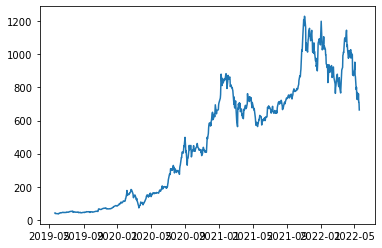

In [23]:
## Part 2: Visualize the timeseries dataset using line plot

import numpy as np
import matplotlib.pyplot as plt
plt.plot(stock_data.Close)  #For univariant analysis ploting one time dependent feature

## Observe in the x-axis our plot automatically took the Date column that we set as row index

On observing the above plot we can clearly see the the data distribution is complex and it won't be right to calculate the closing price of the stock using linear regression since it might give the missleading preditions

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

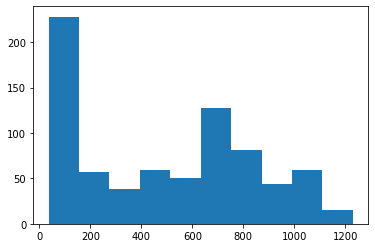

In [24]:
plt.hist(stock_data.Close)

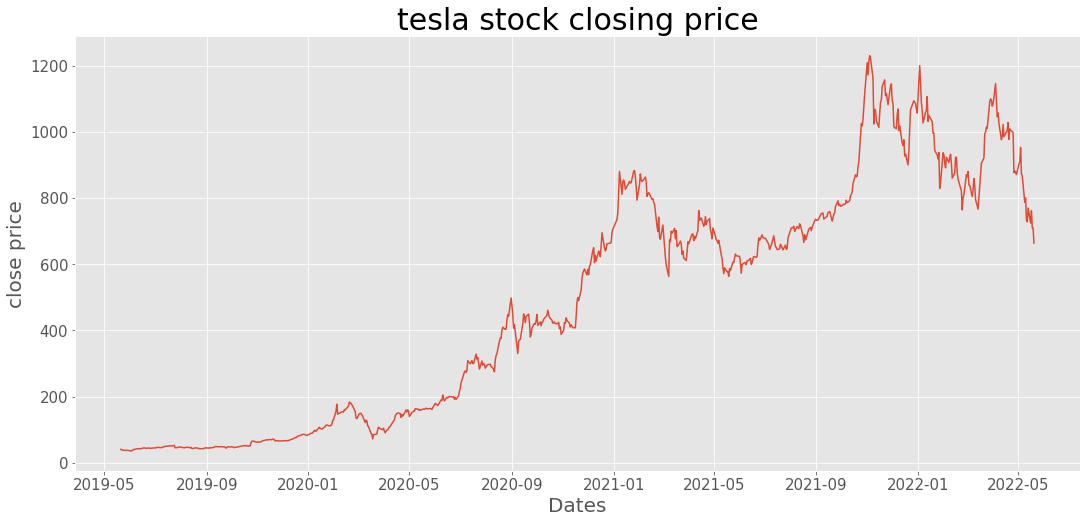

In [26]:
## In ealier graph we see a lot of overlapping in Date column. So let's plot the line graph in more better way

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()

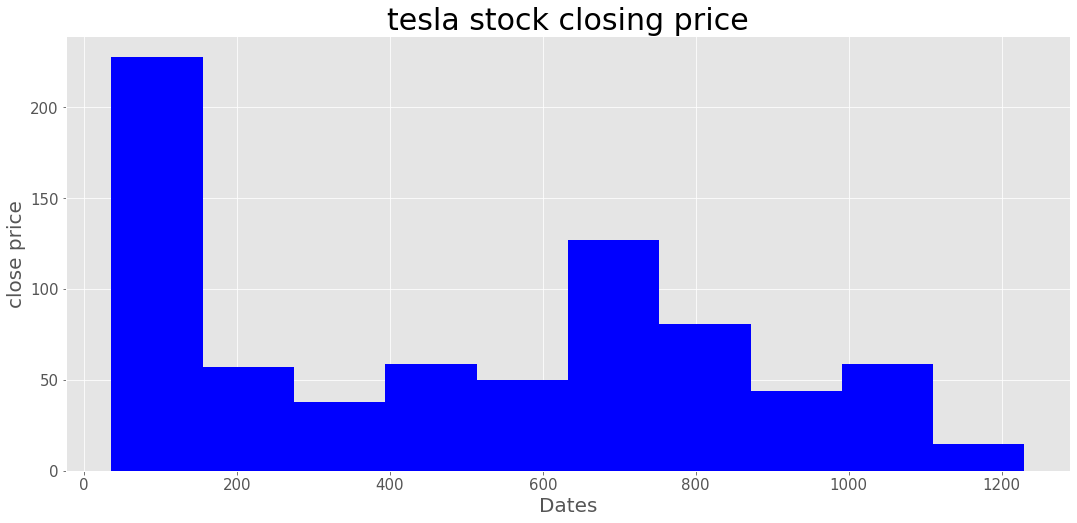

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

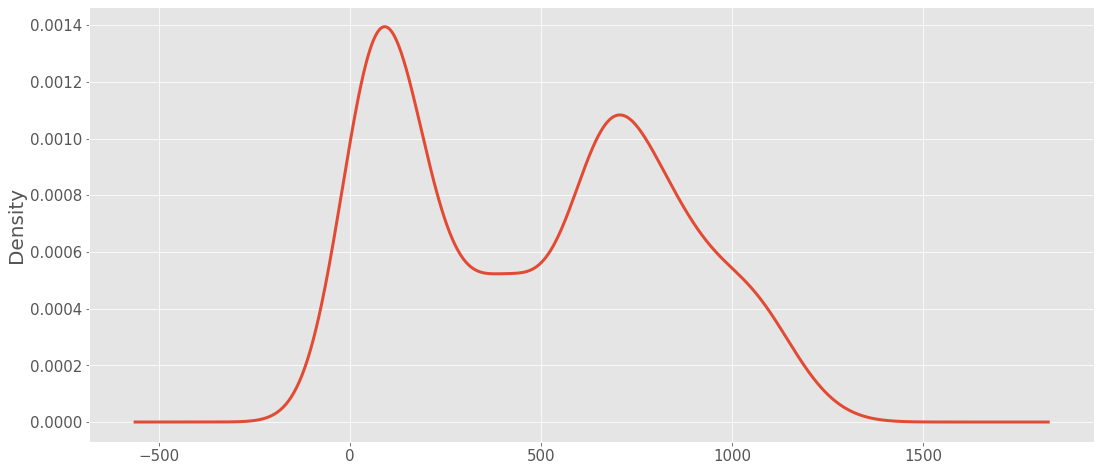

In [28]:
#This is kde (kernel desity estimate) graph which is the smoothened graph of the above plotted histogram

df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [44]:
rolmean=stock_data["Close"].rolling(365).mean()

## rolling is use to define the window size. 
## stock_data["Close"].rolling(365) means over Close column we are defining window size=365 which is 1 year timeframe.
## and when we applied the mean we acutually calculated SMA (simple moving average) in 1 year timeframe.
## Recall the SMA that we discussed

##Also why we selected window size as 365?
#Ans: This is a hyperparameter. Initially when we ploted rolmean(in below cell) with
#window size=3 then we were not getting very much smoothening as a result we were not able to understand the overall
#trend of the close price column. This is the reason why we selected a much higher window size=365 which is we are trying to see
## trend in 1 year timeframe and we were able to get a very clear smoothening representing the upward trend.

In [33]:
stock_data["Close"].rolling(3).std()

## Calculating the standard deviateion for a window size=3.
## To understand the output(Why we are getting NAN for first 2 records) simply recall how SMA for 3 window size
## discussed during lecture

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

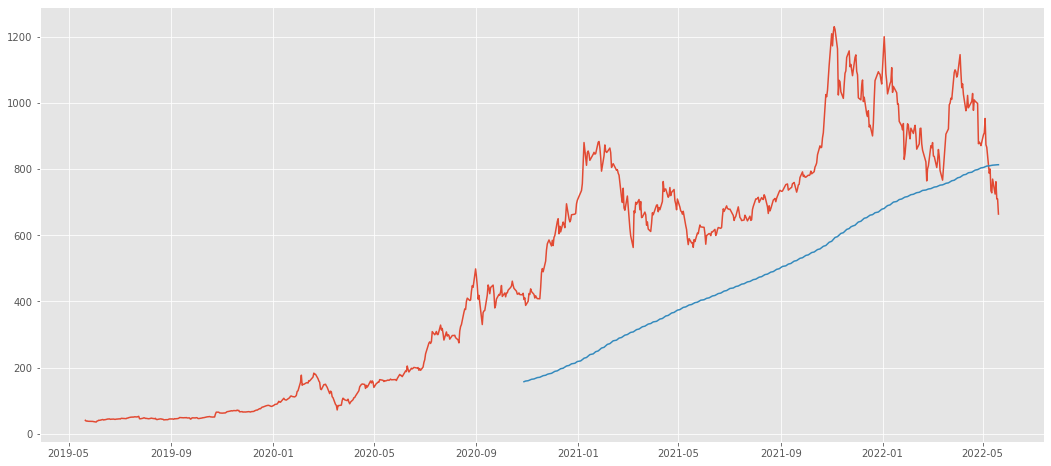

In [45]:
#Smoothened curve wrt rolling mean or SMA

plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)  #Represented by red line
plt.plot(rolmean)           #Represented by blue line
plt.show()

#Why are we doing smoothening?
#Ans: Recall reasons discussed during lecture

#Why smoothened curve started after "2020-09"?
#Ans: This is because window size is 365 so for the starting 354 values rolling mean will be NAN.
#Rolling mean will be calculated only when: total no. datapoints = window size
## Additionally, we can explore how we can fill these NaN values. Some drop it, some keep it as it is... so on

Using above graph we can visualize the data is having uptrend. Which means that mean and variance is not constant with time. Therefore this timeseries distribution is non stationary. This is visualization approach of determining whether time series dataset is stationary/non stationary. Below we will check how can we determine stationary/non stationary using the statistical method.

# Hypothesis testing using adfuller
Null hypothesis: H0 = My timeseries dataset is non-stationary<br>
Alternate hypothesis: H1 = My timeseries dataset is stationary<br>

Applying hypothesis testing if we get the pvalue <=0.05 (by default 95% confidence interval) then reject the null hypothesis else accept the null hypothesis(fail to reject the null hypothesis)<br>

Please note that adafuller is internally going to perform the hypothesis testing in the similar manner and is going to return the pvalue which can be used to determine whether timeseries dataset is stationary or non stationary.

In [46]:
#Part 3: Checking Stationary/Non Stationary using adfuller

from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [47]:
adft

#In the returned tuple we are going to use the second element which is representing the pvalue
#using which applying hypothesis testing we can determine where the timeseries dataset is 
#Stationary or Non Stationary.

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [48]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

## Here since pvalue is not <=0.05. Therefore, we fail to reject the null hypothesis. Or in other words
## we accept the null hypothesis. Which means current timeseries data is non stationary

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

# Let's summarize whatever we have discussed so far using test_stationarity() function

In [49]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for adft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

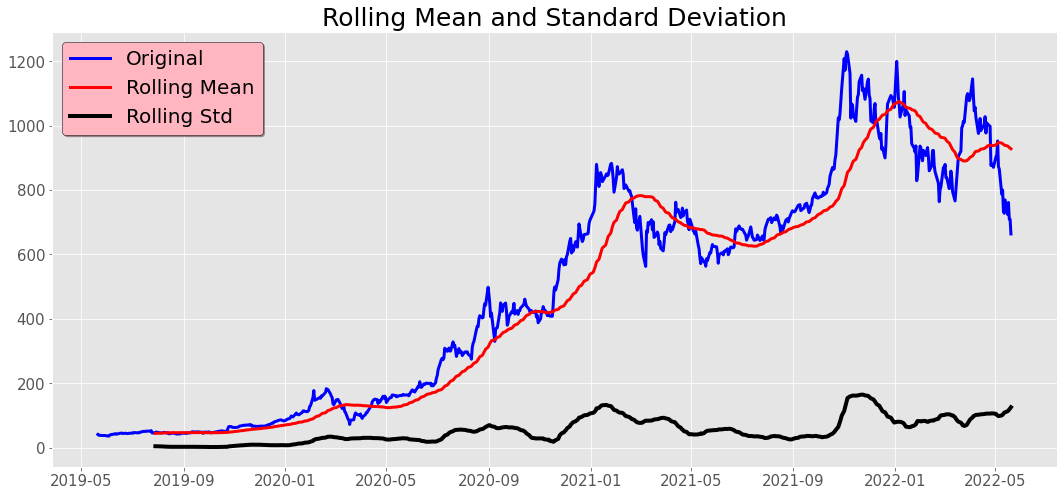

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [50]:
test_stationarity(stock_data.Close)

# Decomposing the time series dataset into Trend, Season and Residual using seasonal_decompose library

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

## stock_data["Close"] represents the time series dataset that we wish to decompose

## model= "multiplicative" represents the component of decomposition.
## Recall, that there are 2 components - Additive and Multiplicative. Since our timeseries data set is Non Stationary(ie; not having
## constant mean/variation) hence we will be using multiplicative component for decompostion. If our time series dataset
## was Stationary then we would end up using additive component for decomposition.

## period=30 represents the window size. Like if we are observing the trend(SMA) then in what window we would be observing
## that. Since we are having day wise stock price analysis hence 30 represents 30 days or 1 month

<Figure size 1440x720 with 0 Axes>

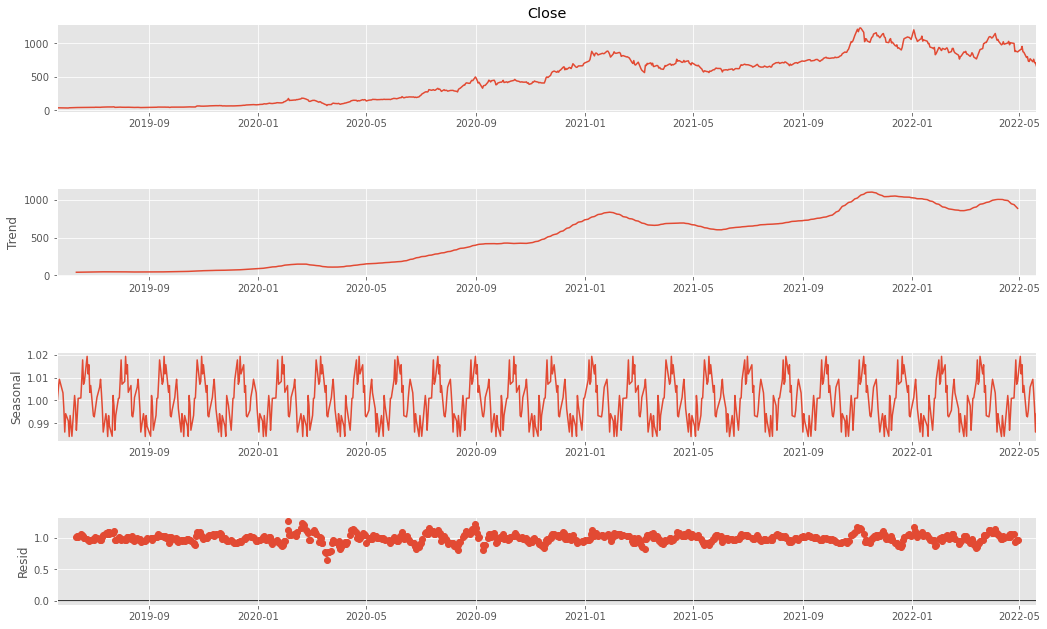

In [66]:
# Ploting the decomposed timeseries dataset

plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [59]:
result.seasonal

#This is how we will get numeric representation of seasonal value for each datapoint

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [61]:
result.resid
#This is how we will get numeric representation of residul value for each datapoint
##Since in most of the case from graph resid is near 0 that's why we are getting NaN

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [63]:
result.trend

#Observe trend is giving NaN wrt to each datapoint. This is because trend cannot be represented as
#a number. It can be either uptrend, downtreand or constant/no trend.

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

# Outlier analysis using box plot

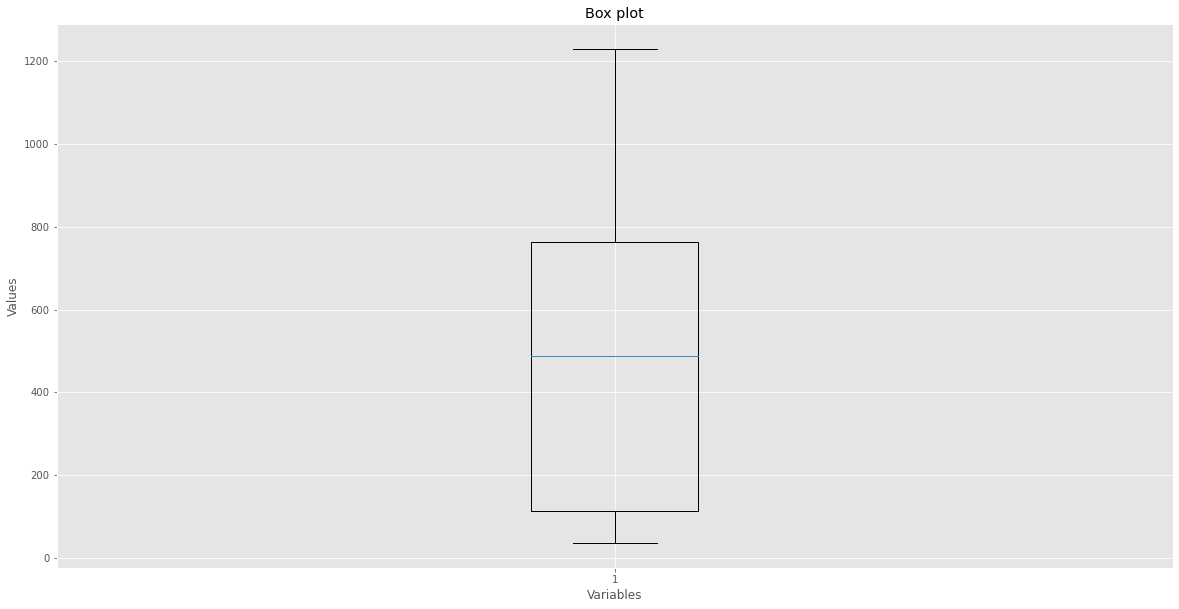

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

From the above boxplot we can conclude that there is no datapoint (from our time series dataset) laying above or below the defined fence. Therefore, there are no outliers present in our dataset.

# Autocorrelation and Partial autocorrelation:
Here, we will be seeing the correlation or relationship(which will return the strength value) of time dependent variable in our time series dataset with itself (Recall the lecture) 

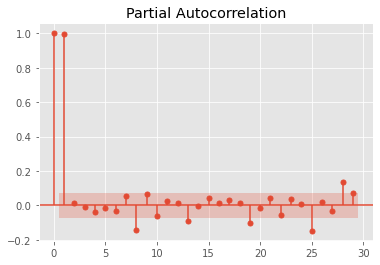

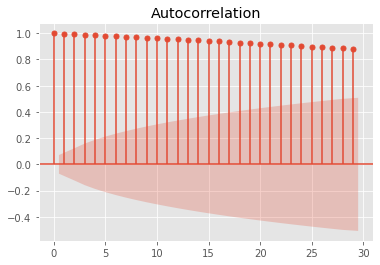

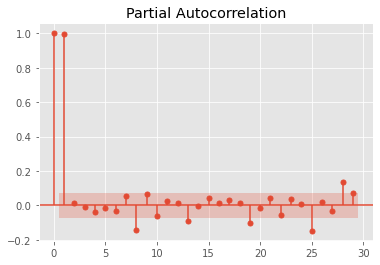

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In the above graphs x-axis represents lag0, lag1, .. so on<br>
y-axis represents correlation value<br>
For autocorrelation graph at lag0 correlation of time dependent variable ("Close") with itself is highest(1)

# Preprocessing of the data

1. fill the missing values(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

# Now we will be converting the Non-Stationary time series dataset into Stationary time series dataset using differencing method

Below image demonstrates how first and second differencing is determined where blank spaces are equivalent to NaN
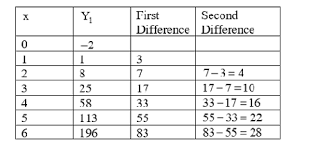

or 

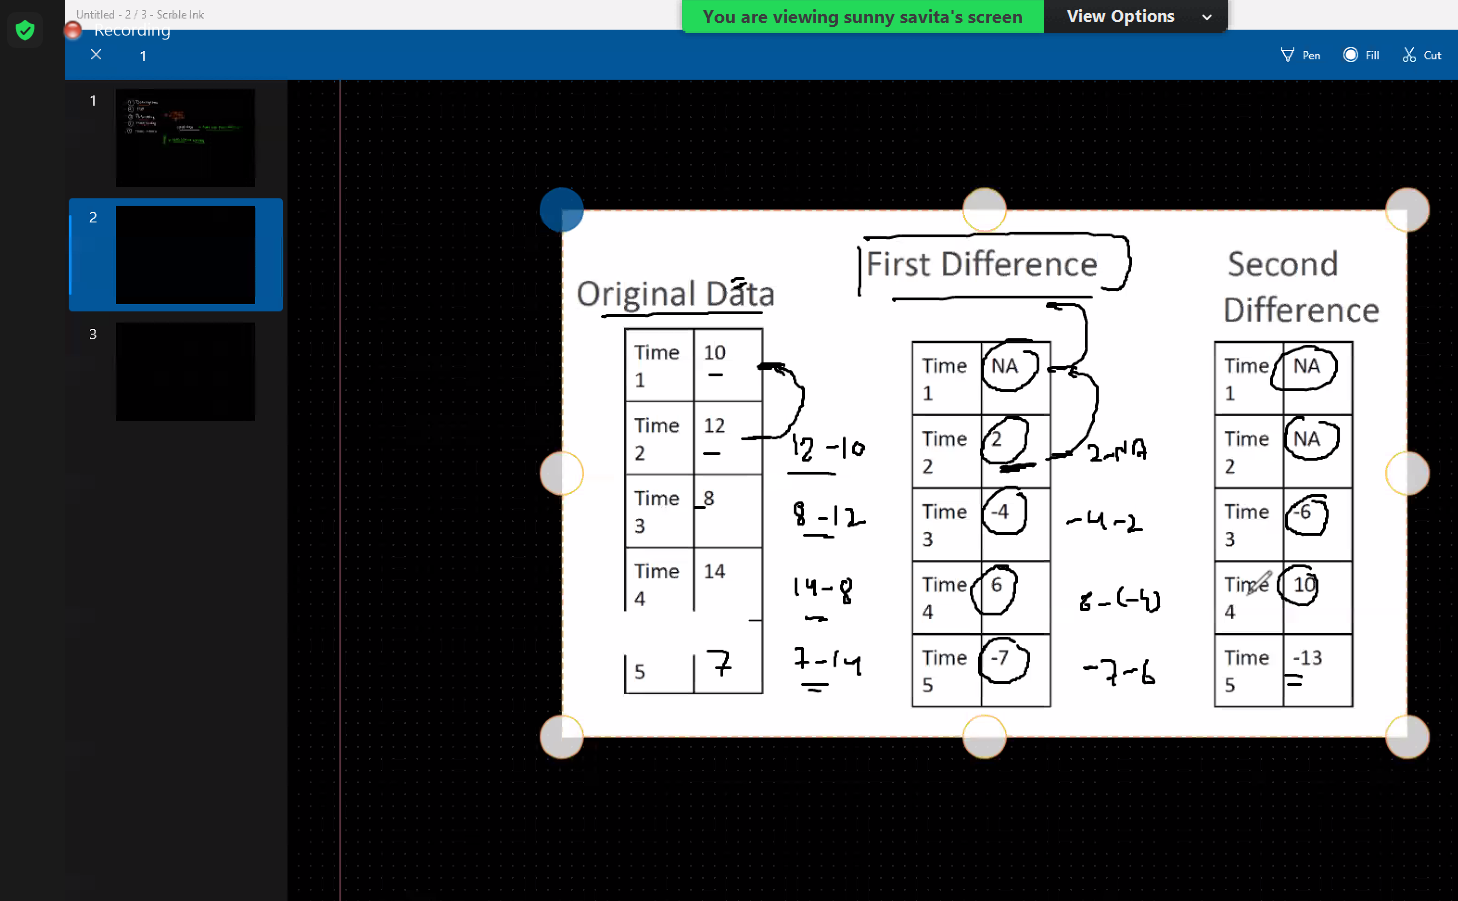

In [69]:
df_close=stock_data["Close"] #This is the time dependent timeseries data which we want to make stationary

In [73]:
tsla_close_diff_1=df_close.diff() #by default diff() will give the first differencing

In [75]:
tsla_close_diff_1=tsla_close_diff_1.dropna() #Remving NaN generated while creating differencing

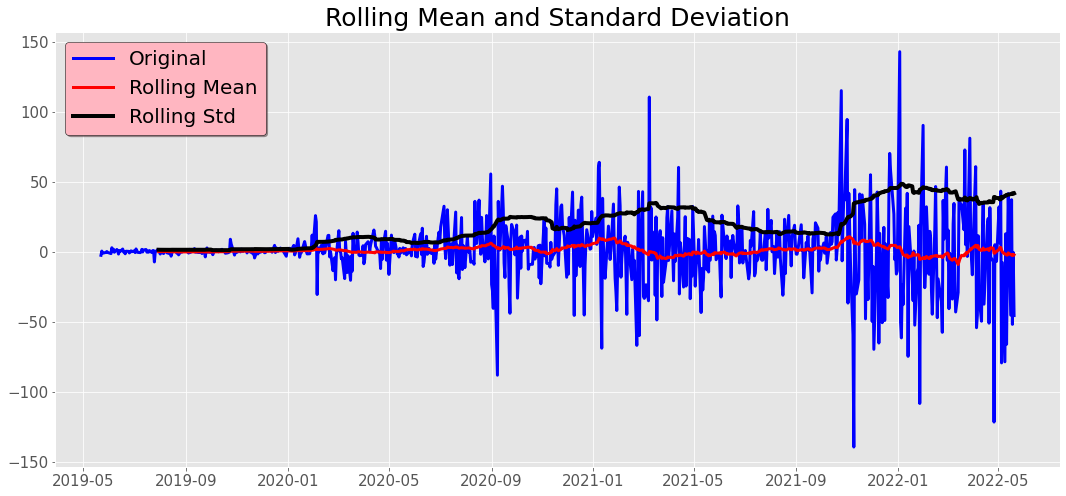

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [76]:
test_stationarity(tsla_close_diff_1) 
#Now we are using using the user defined function test_stationarity() to test the whether this first difference
#data is stationary or not?

## If respective differncing is stationary then we will take it forward to building the time series based learning model
## But, in case the respective differencing is non stationarry then we will check another differencing(diff(2), diff(3).. so on)

## IMP:
# - From the graph we can see that rolling mean is almost flat which means constant trend, hence
#   using first differencing we have converted the time series dataset into stationary

# - Since pvalue < 0.05 hence, we will reject the null hypothesis (H0: Data is non stationary). Which means using adfuler
#   or Dickey Fuller hypothesis testing we our respective differenced timeseries data is converted into stationary 

In [71]:
df_close.diff(2) #diff(2) will return the second differencing

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

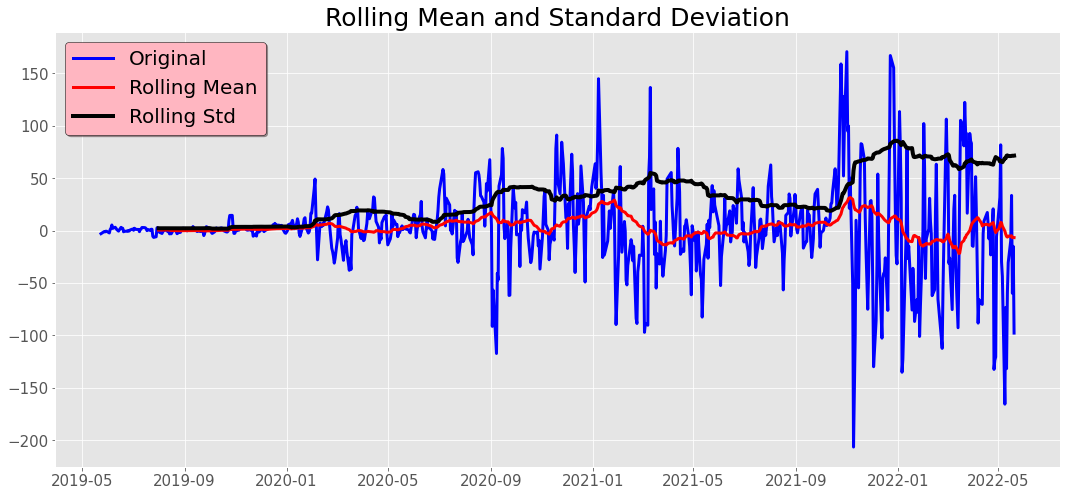

Results of dickey fuller test
Test Statistics               -5.697365e+00
p-value                        7.817959e-07
No. of lags used               1.900000e+01
Number of observations used    7.350000e+02
critical value (1%)           -3.439278e+00
critical value (5%)           -2.865480e+00
critical value (10%)          -2.568868e+00
dtype: float64


In [77]:
## For experimentation purpose we are checking stationarity for diff(3)

tsla_close_diff_3=df_close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [110]:
# Here we don't use train_test_split method for splitting the dataset since we don't have training and testing 
# dataset in X and y format. Therefore, we can use the demonstrated slicing approach

train_data=df_close[0:-60]  #All the datapoints leaving the last 60
test_data=df_close[-60:]

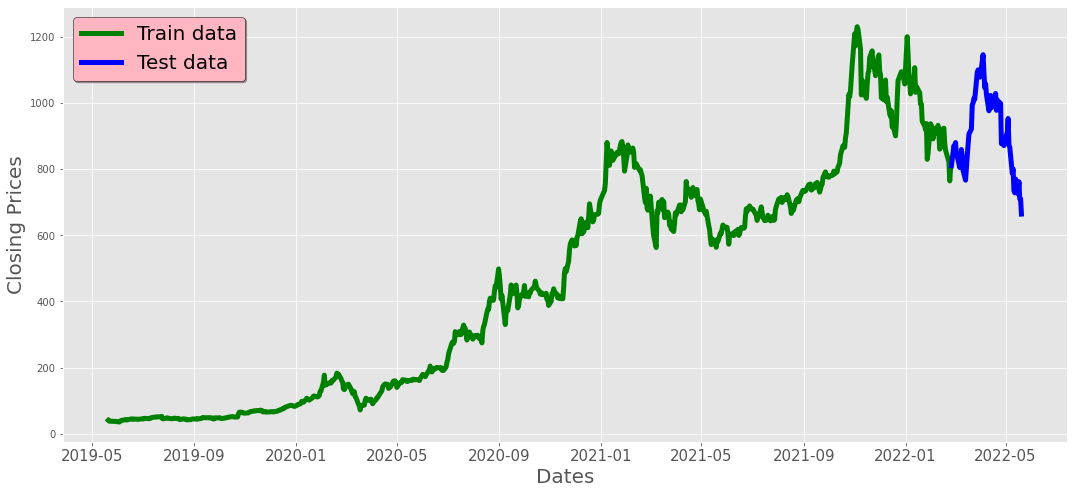

In [79]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

## Please note we need to use this way of importing the ARIMA in case we are getting the error in the below discssed way
## of importing the library

# ARIMA will be used to train the time series based model and mean_squared_error and mean_absolute_error will be used as the metric to measure the performance of the trained time series based model

In [80]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
#As a first step to train the ARIMA model we will be defining the history which will be utilized
#by the ARIMA model object. Training dataset in form of list is what we will be using to initialize the history

history=[x for x in train_data]

In [82]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [83]:
#Here, order(1,1,1) is the order of AR(Auto Regression), I and MA

model=ARIMA(history,order=(1,1,1))

### ARIMA breakdown:

- order(1,1,1) = order(p, d, q)<br>
where, p, d and q can be any integral value and represents the lag value

- ARIMA breakdown: AR = Auto regression, I = Integrated, MA = Moving Average

- Lag value for AR is calculated using PACF(partial auto correlation function)

- Lag value for I is calculated using differencing method (time series data at current timestamp - time series data at previous timestamp)

- Lag value for moving average is calculated using ACF(auto correlated function)

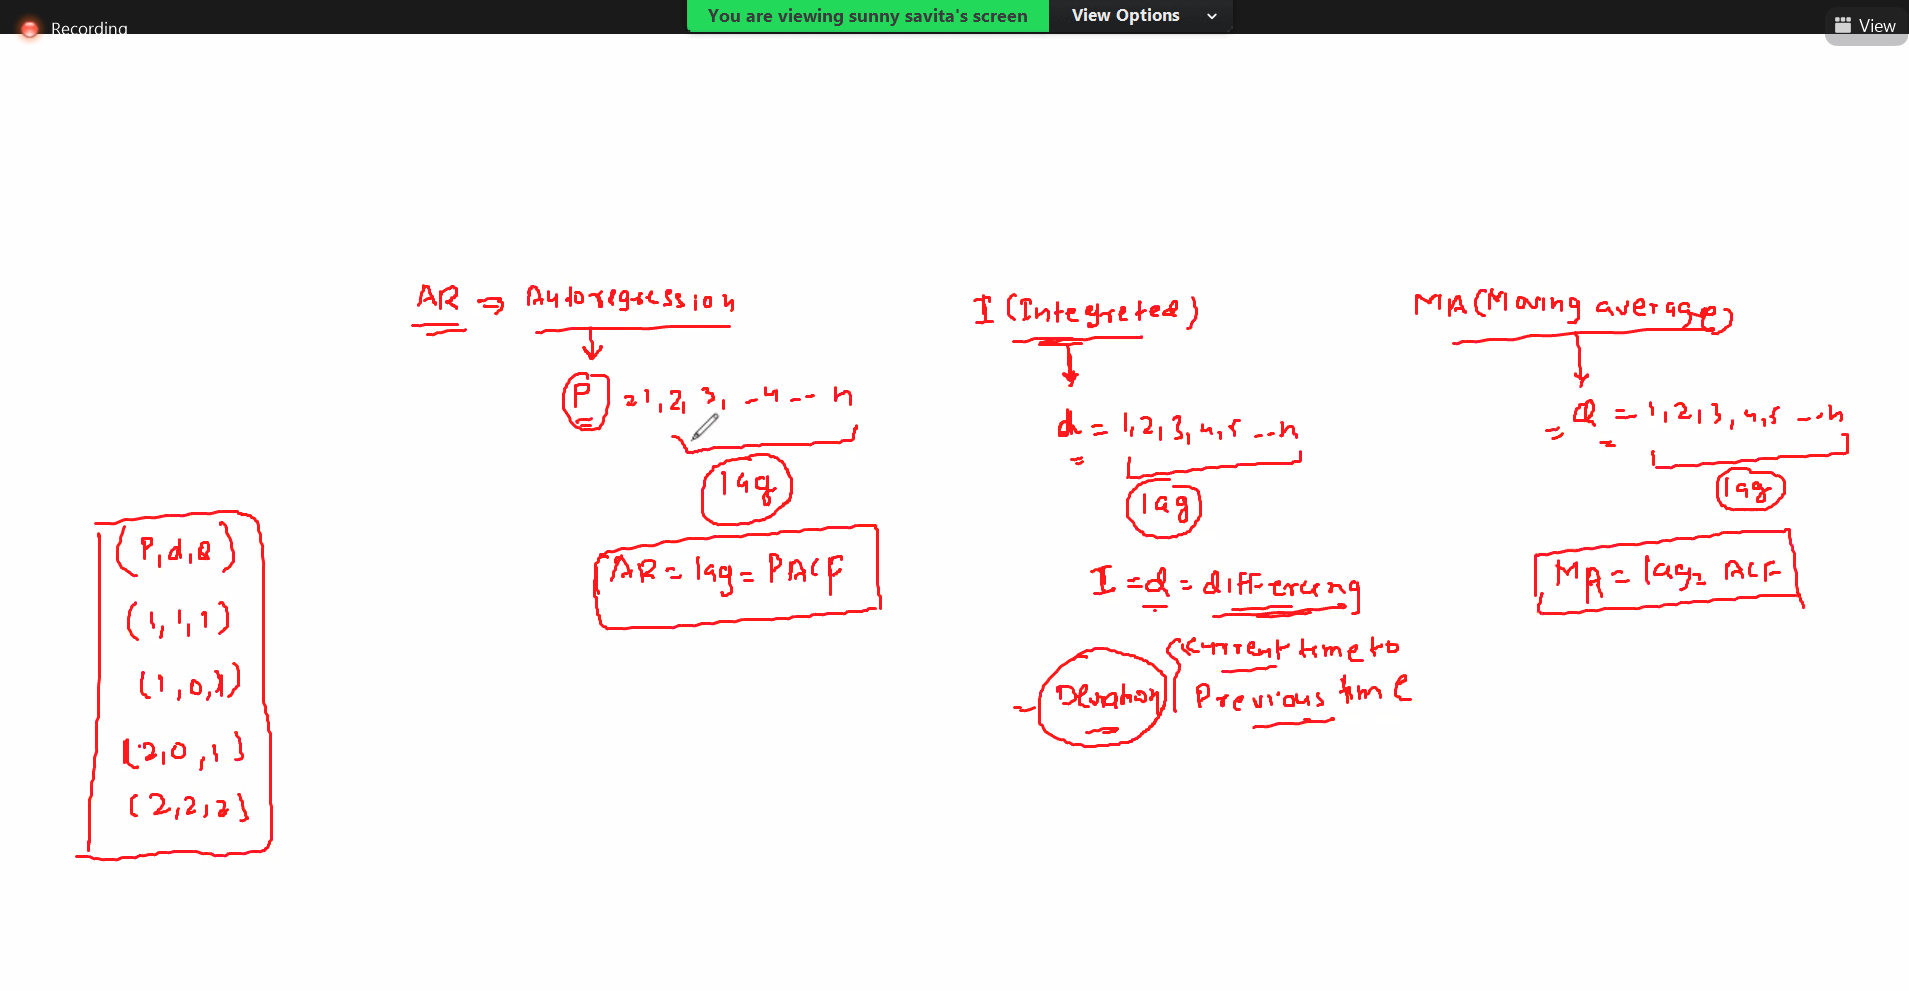

### SARIMA breakdown:

- Order that we define in the ARIMA model is for the entire dataset
whereas, in case of SARIMA we define it for each seasons.
- Order of ARIMA is represented by (p,d,q) which are lag values whereas, order of SARIMA is represented with (P,D,Q)suffix x where x represents the seasons

- SARIMA= S(Seasonal Factor) + ARIMA or (p,d,q)*(P,D,Q)suffix x

- In the pic below red curve represents the entire timeseries dataset on top of which we are applying ARIMA whereas the green circles are representing the timeseries dataset (subset of entire time series dataset) which is season

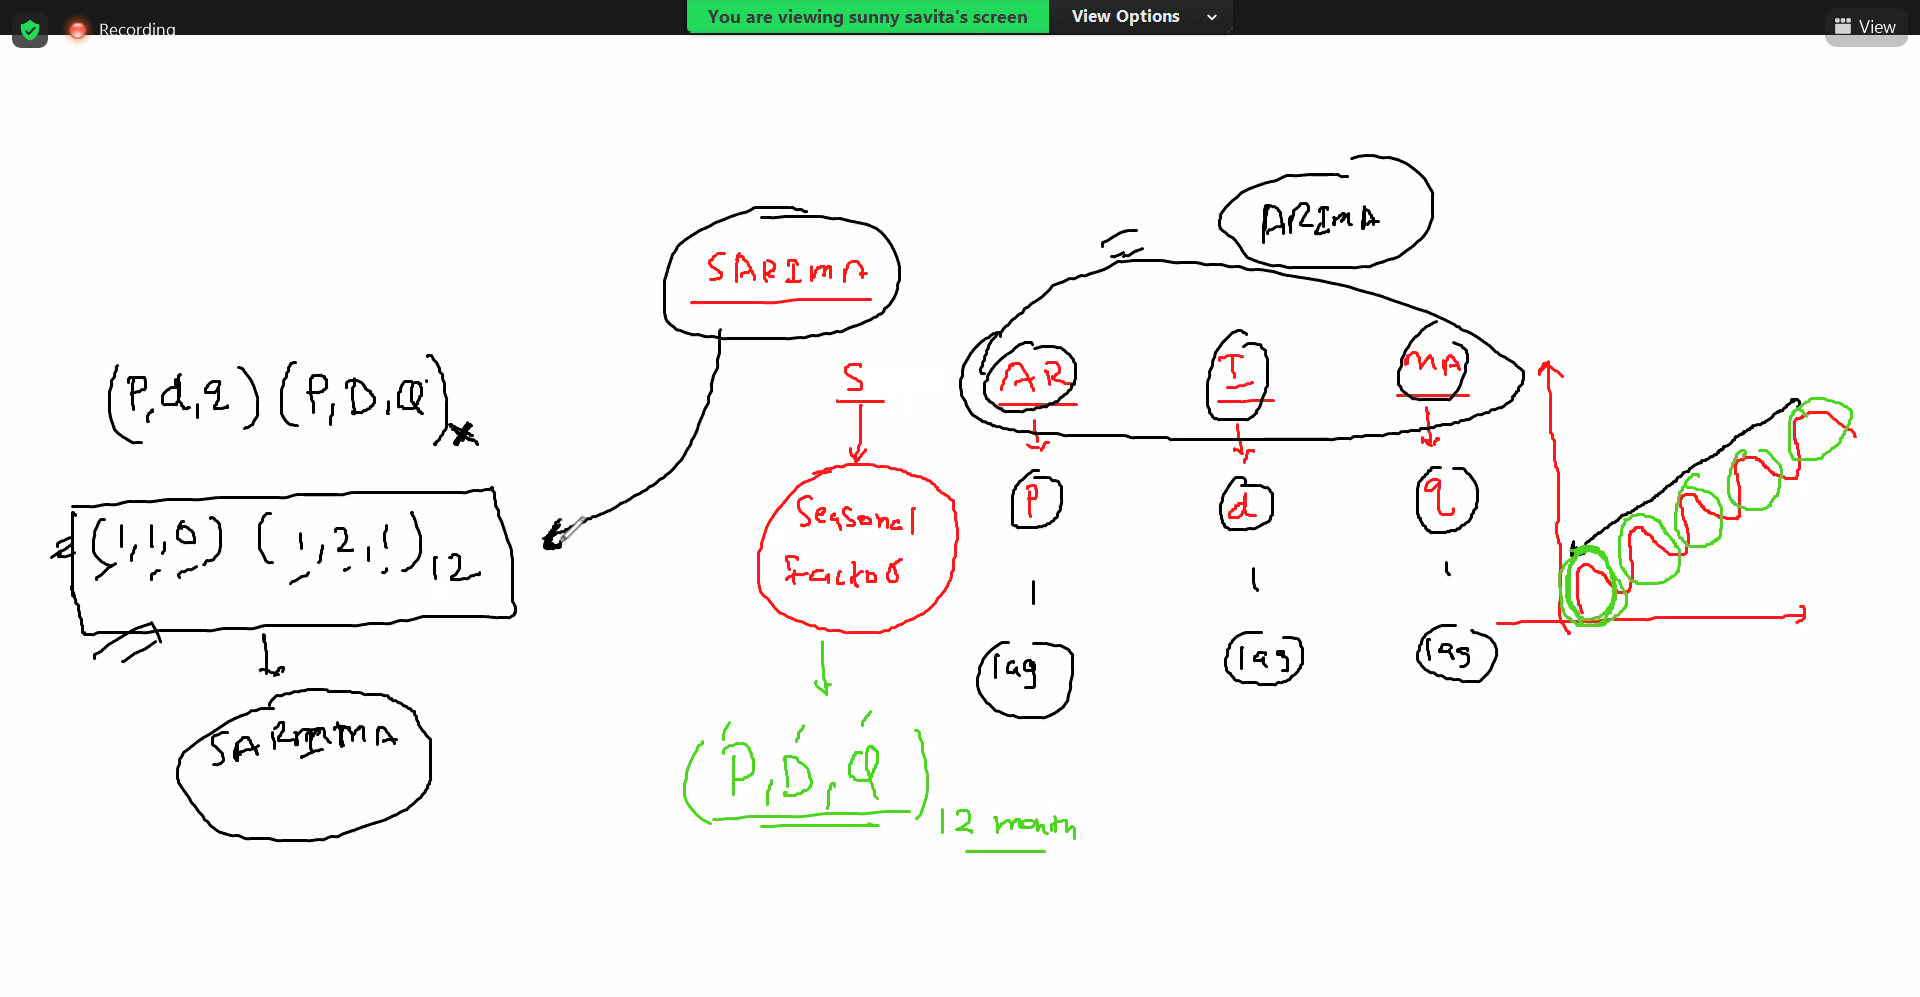

### AR equation using an example:

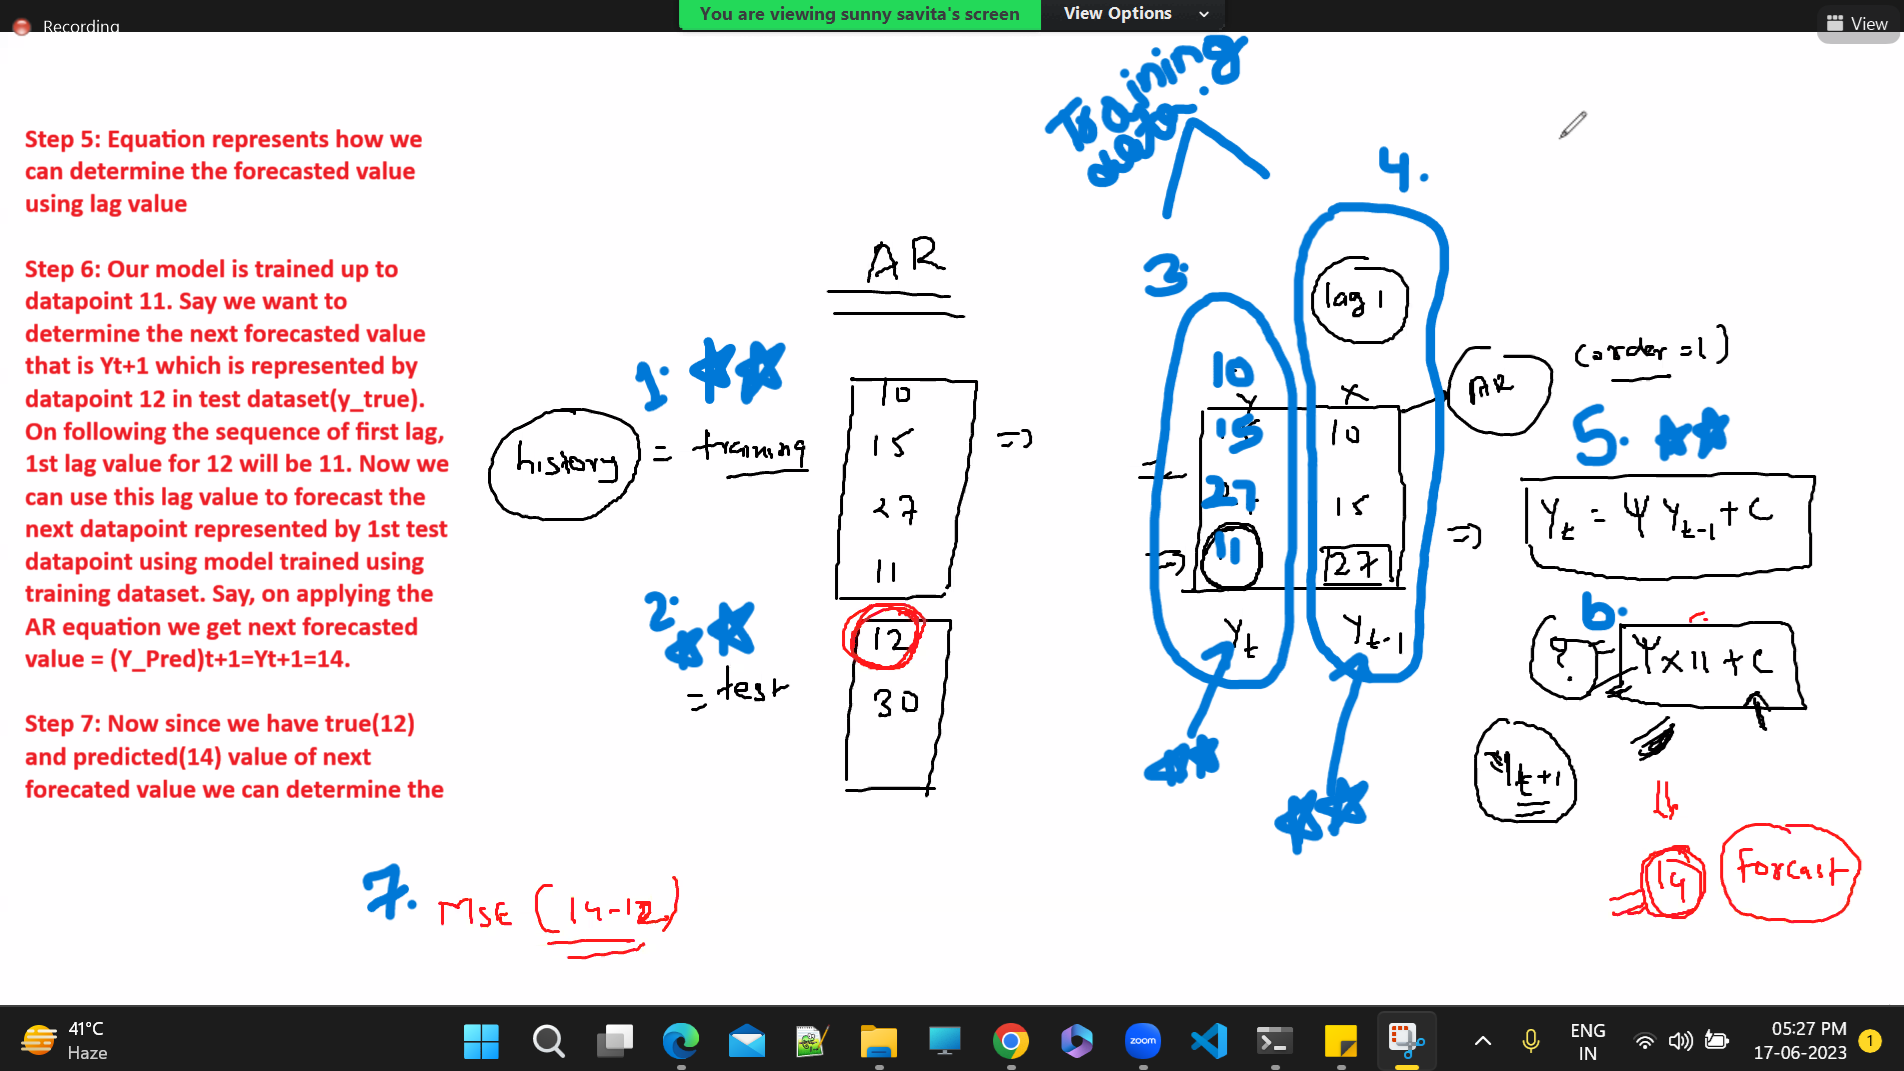

### Similarly, determining the complete equation of ARIMA = AR + I + MA:

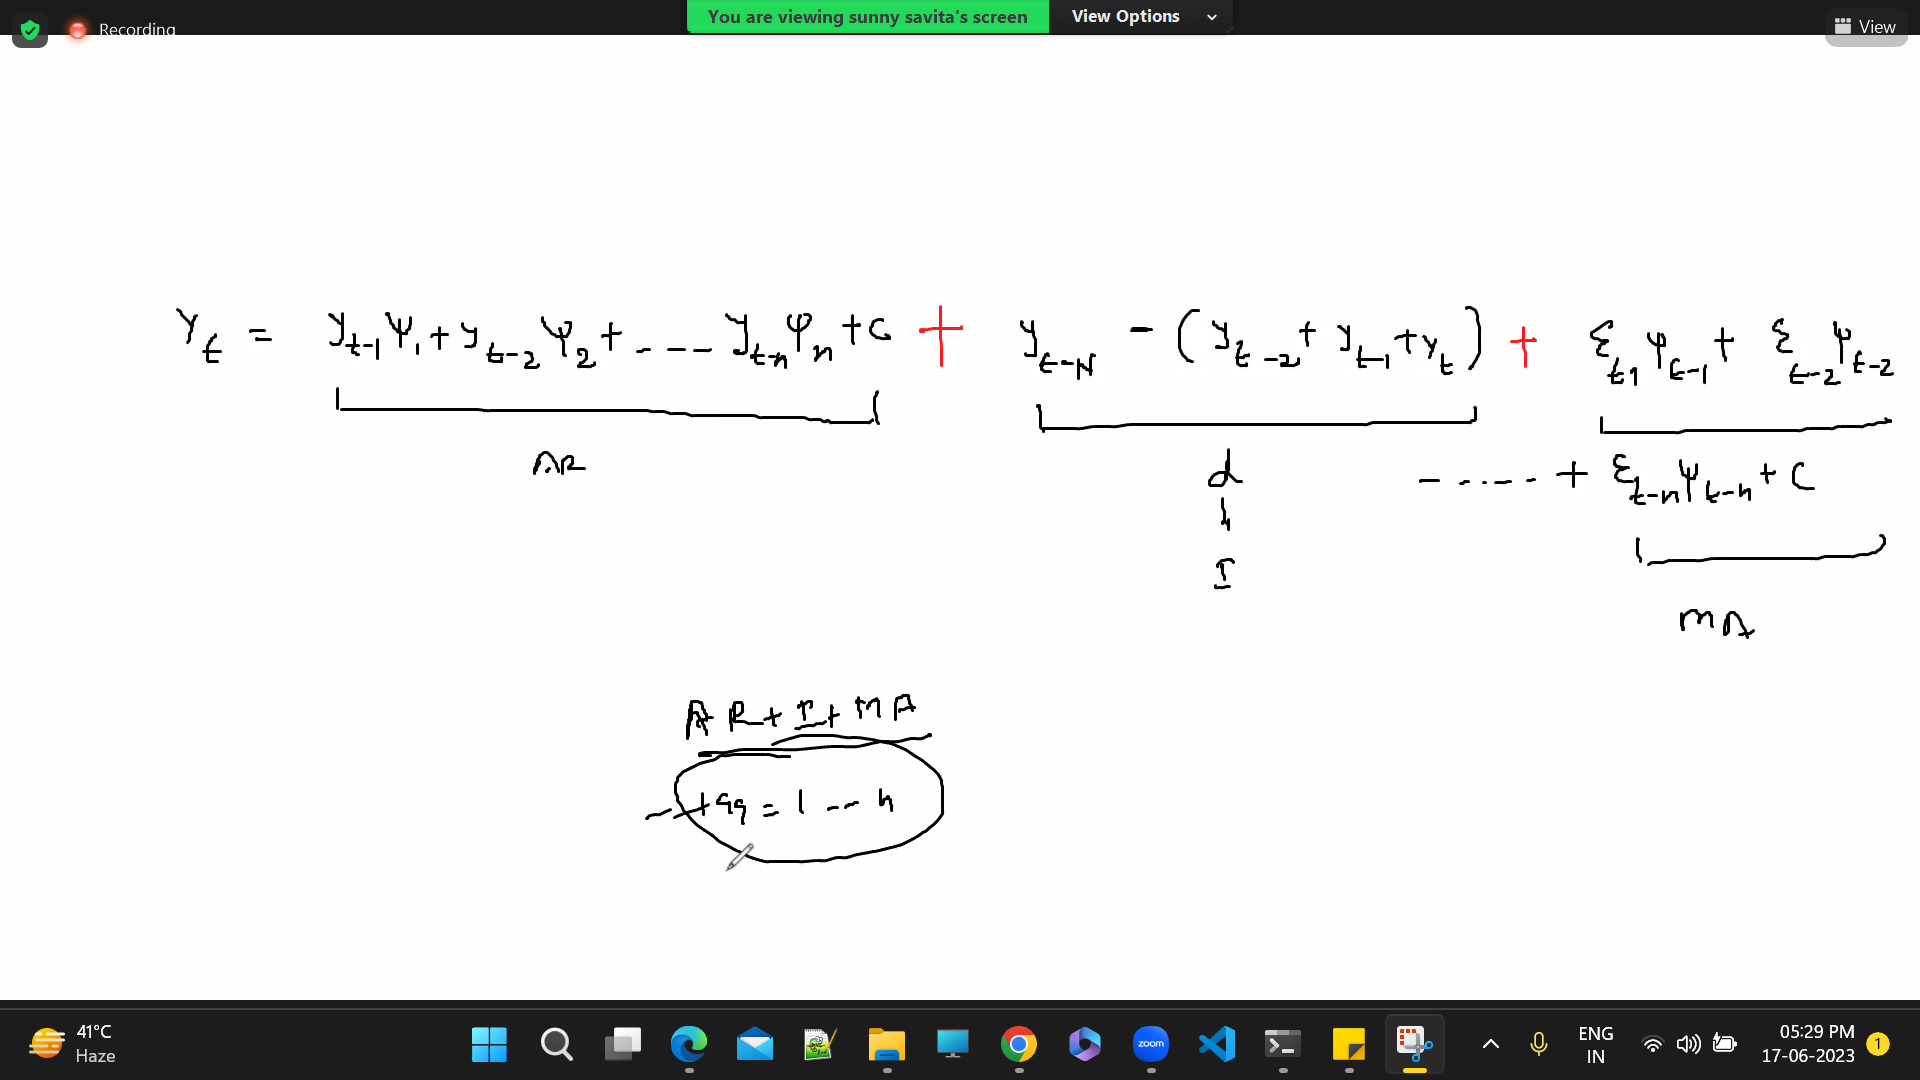

In [85]:
model=model.fit()

In [86]:
model.summary()

# Imp:
# This summary is similar to the summary that is generated in OLS model which is a linear regression model
# in which optimization happens without Gradient Descent.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3149.432
Method:                       css-mle   S.D. of innovations             22.189
Date:                Sat, 17 Jun 2023   AIC                           6306.864
Time:                        17:10:25   BIC                           6325.051
Sample:                             1   HQIC                          6313.896
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0893      0.801      1.360      0.174      -0.481       2.660
ar.L1.D.y      0.2608      0.507      0.514      0.607      -0.734       1.255
ma.L1.D.y     -0.2954      0.501     -0.589      0.556      -1.278       0.687
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.8343           +0.0000j            3.8343            0.0000
MA.1            3.3850           +0.0000j            3.3850            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
model.forecast()

## .forecast() is going to return the forecasted value which is similar to y_pred

(array([801.36498184]),
 array([22.18939203]),
 array([[757.87457261, 844.85539106]]))

In [89]:
test_data[0] # This is true acutal value that we forecasted above. That is y_true

809.8699951171875

In [91]:
mean_squared_error([test_data[0]],model.forecast()[0])

## model.forecast()[0] --> This will give the next forecasted value or y_pred

## test_data[0]] --> This will give the true value of next forecasted value or y_true

## Imp: Observe here that we are getting according to mse our model is 
## 72% error rate. This may be because we used the non stationary time series dataset directly
## for training. May be if we are going to use the stationary converted time series dataset then 
## we might be getting better mse(lower is the better)

72.3352508526749

In [95]:
## Review below part only after reviewing the ARIMA and SARMIA breakdown that has been discussed earlier


def train_arima_model(X, y, arima_order):  ## This is the funcion that will be used to train the arima model using differnt (p,d,q) combinations
    # prepare training dataset
    # make predictions list
    history = [x for x in X] #Creating history in list format that represents the history using training dataset represented with X
    predictions = list() #Creating the empty list in which we will append the next forecasted values
    for t in range(len(y)):  #y represents the testing dataset. It's length is equivalent to number of times we are going to generate the next forecasted value(Y_Pred) for model validation purpose using rmse
        model = ARIMA(history, order=arima_order) #Training the ARIMA model
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]  #very next forecasted value
        predictions.append(yhat)
        history.append(y[t]) #Why? Because in order to make the next next forecasting we woud be requring the true value of current forecasted value in history(train dataset)
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions)) #to measure the performance calculating the rmse--> lower is better
    return rmse

In [96]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None  ##This is just initialization where we are initialising best_score with very big number that is infinite and best_cfg with None
                                               ## best_score represents the 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)  ## datset represents the train dataset and test represents the test dataset
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order #reinitializing the best_score and best_cfg when rmse < best_score
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [97]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3) 
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.162
ARIMA(0, 1, 0) RMSE=39.610
ARIMA(0, 1, 1) RMSE=39.578
ARIMA(0, 1, 2) RMSE=39.728
ARIMA(0, 2, 0) RMSE=57.874
ARIMA(0, 2, 1) RMSE=39.631
ARIMA(0, 2, 2) RMSE=39.598
ARIMA(1, 0, 0) RMSE=39.478
ARIMA(1, 0, 1) RMSE=39.447
ARIMA(1, 0, 2) RMSE=39.573
ARIMA(1, 1, 0) RMSE=39.569
ARIMA(1, 1, 1) RMSE=39.620
ARIMA(1, 1, 2) RMSE=39.762
ARIMA(1, 2, 0) RMSE=46.216
ARIMA(1, 2, 1) RMSE=39.591
ARIMA(1, 2, 2) RMSE=39.845
ARIMA(2, 0, 0) RMSE=39.439
ARIMA(2, 0, 2) RMSE=39.787
ARIMA(2, 1, 0) RMSE=39.746
ARIMA(2, 1, 1) RMSE=39.670
ARIMA(2, 2, 0) RMSE=45.811
ARIMA(2, 2, 1) RMSE=39.758
ARIMA(2, 2, 2) RMSE=39.928
Best ARIMA(2, 0, 0) RMSE=39.439


In [94]:
## Here we are just printing all the combinations of (p,d,q) which represents the different lag values for the ARIMA model

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [121]:
## Now, we are going to take the best combination and train the model and will use it for the real time inferrencing
## ie; Best ARIMA(2, 0, 0) RMSE=39.439

history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,1,0)) #Here order should be (2,0,0) since score is highest for this combination of lag ie; (p,d,q). In class when sunny used (2,0,0) then he was getting rmse very high around 25546 which is not matching with our earlier record's best score rmse 39.439 .
    model_fit = model.fit()
    fc, se, conf = model_fit.forecast(alpha = 0.05) #fc->forecasted value; se->standard error; conf->cofficient(recall in equation we were having one trishul symbol. For lag 1 we will have 2 trishuls). We need only fc value that is why in previous implementation we used the same by indexing [0]
                                                    #by default alpha is 0.05 only may be. alpha represents the confidence interval
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 39.569437246985444


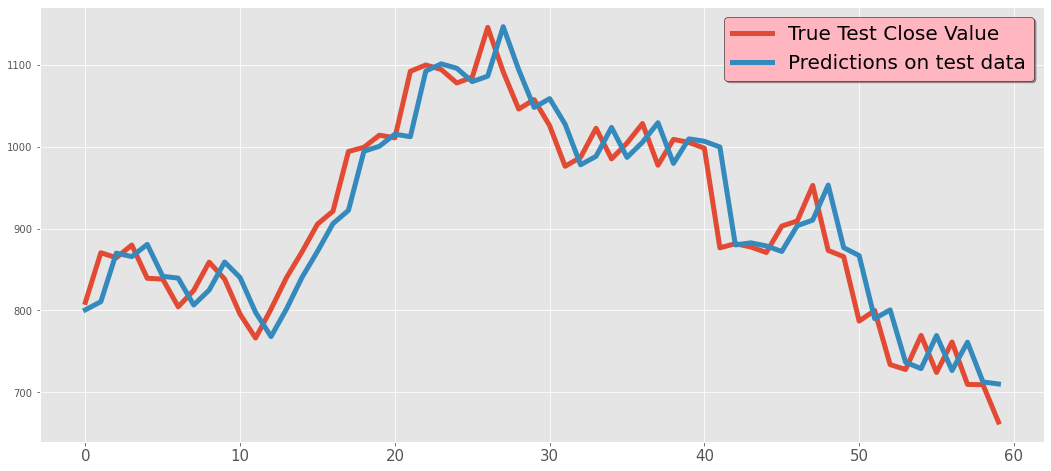

In [113]:
## Forecast Vs Actual value plot in case of ARIMA

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [115]:
## Above we trained the time series model using ARIMA. Now, we are going to use SARMIA or SARIMAX. both are same just in SARIMAX we are having one more attribute exog which by default is set to None. We can see the documentation

import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3)) #order represents the order wrt ARMIMA ie; (p,d,q) and seasonal_order represents the order wrt seasonal factor ie;(P,D,Q,season_value). Here 3 represents that 3 days is equivalent to 1 season
                                                        #Please note that we can decide the best combination of order and seasonal_order the same way we did in case of ARIMA
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05) #Please note that forecast wrt ARIMA returns 3 values(forecast,standardError and cofficient) whereas, forecast wrt SARIMA or SARIMAX returns only 1 value which is the value of next forecast
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 39.739481892720725


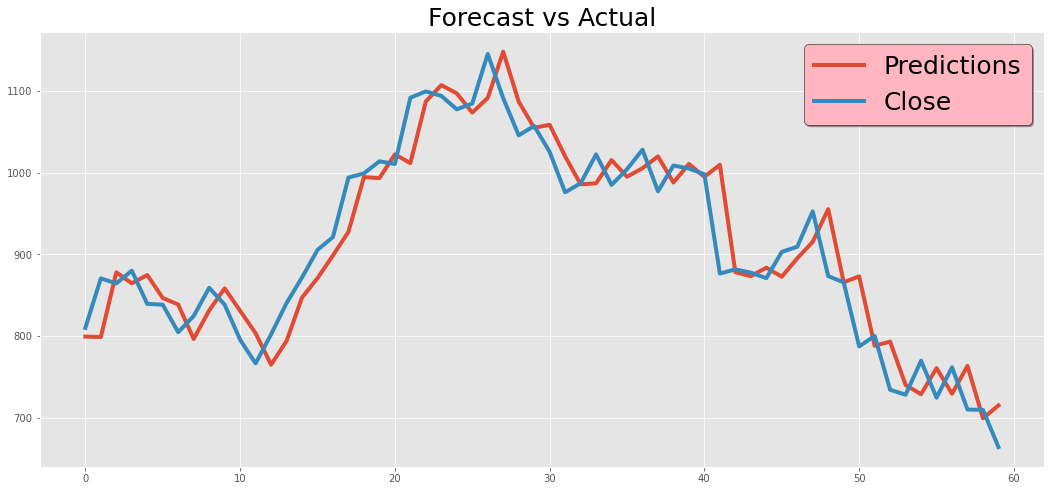

In [116]:
## Forecast Vs Actual value plot in case of SARIMA or SARIMAX

plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)  #Predicted
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)  #Actual
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

# Until now we did prediction or forecasting over seen data that is test data split. Now we will see how we can do the prediction over unseen data which will be real time inferencing or real time forcasting

In [117]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

# Making prediction over unseen data using .plot_predict() method

Imp Note:
- SARIMAX is not having .plot_predict() method. So, below the model_fit is representing the object of the model that is trained over ARIMA since ARIMA supports the .plot_predict() method

- plot_predict(start=1,end=len(df_close)+365,ax=ax1) where, start represents starting index whereas end represents the ending index. ax represents the subplot where we want to plot the resultant graph. 

- We have defined end as len(df_close)+365 where 365 represents that we want to forecast the Tesla's stock price for the next 365 days(unseen data since it is not present in df_close which is dataset of stock price till present date)


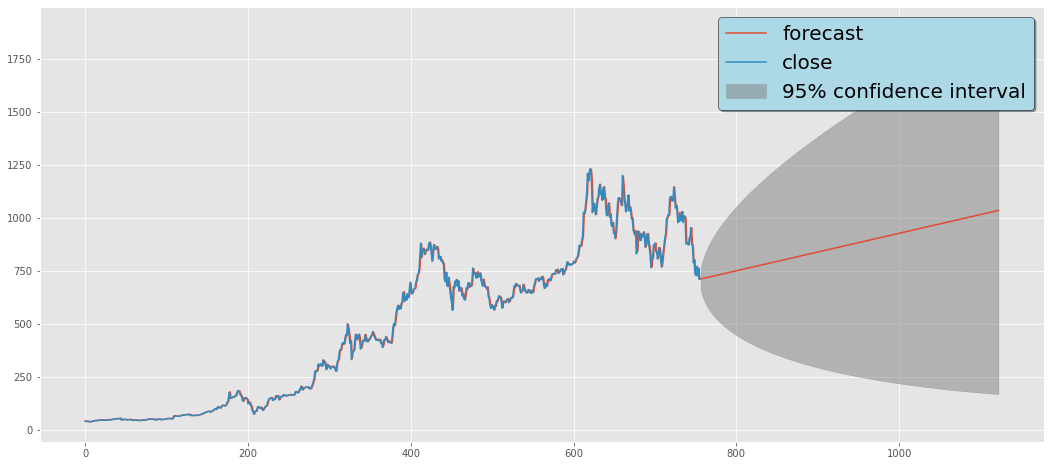

In [125]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.plot_predict(start=1,end=len(df_close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()

# Above we have represented the forecasting of the next 365 days(unseen data) graphically. If we wish to generate the respective numeric value of forecasting then we will need to iterate through the loop and have to append the the forecasting of each new unseen data in the prediction list.

In [ ]:
history=[x for x in df_close]  #creating history using df_close
predictions=list()
#conf_list=list()
for t in range(365):  #next 365 days
    #below model_fit represents the object of timeseries based trained using ARIMA
    fc, se, conf = model_fit.forecast(alpha = 0.05) #fc->forecasted value; se->standard error; conf->cofficient(recall in equation we were having one trishul symbol). We need only fc value that is why in previous implementation we used the same by indexing [0]
                                                    #by default alpha is 0.05 only may be. alpha represents the confidence interval
    predictions.append(fc)
    conf_list.append(conf)
    history.append(df_close[t])
#print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

predictions is the list having numeric values of next 365 days. This is how we can determine the forecasted price for next 365 days with 95% confidence value(Since, we have defined the alpha as 0.05 which is significance level representing the rejection region)

Next Explore Multivariant timeseries analysis from the zip file that sunny shared in the time series github repo